# Young people preferences. 

In this work I would like to explore young people preferences. I use young people survey responses.csv with 150 answers from 1010 students and their friends. 

This work consists of three parts: 

- **Healthy habits visualization and exploring the correlations with other factors.**
- **Is there any correlation between left/right handed people and there scare? **
- **Model to predict gender of the responser.**

I use following libraries for this work: 
- e1071
- ggplot2
- car
- HistData
- resample
- simpleboot
- gridExtra

The code below includes helper functions and the code loading and preparing data.

In [1]:
plot.dists <- function(a, b, cols = c('pop_A', 'pop_B'), nbins = 20){
  dat = c(a,b)
  maxs = max(dat, na.rm = TRUE)
  mins = min(dat, na.rm = TRUE)
  breaks = seq(maxs, mins, length.out = (nbins + 1))
  par(mfrow = c(2, 1))
  hist(a, breaks = breaks, main = paste('Histogram of', cols[1]), xlab = cols[1])
  abline(v = mean(a), lwd = 4, col = 'red')
  mean(a)
  mean(b)
  hist(b, breaks = breaks, main = paste('Histogram of', cols[2]), xlab = cols[2])
  abline(v = mean(b), lwd = 4, col = 'red')
  par(mfrow = c(1, 1))
}

plot.hist <- function(a, maxs, mins, cols = 'difference of means', nbins = 80, p = 0.05) {
  breaks = seq(maxs, mins, length.out = (nbins + 1))
  hist(a, breaks = breaks, main = paste('Histogram of', cols), xlab = cols)
  abline(v = mean(a), lwd = 4, col = 'red')
  abline(v = 0, lwd = 4, col = 'blue')
  abline(v = quantile(a, probs = p/2), lty = 3, col = 'red', lwd = 3)  
  abline(v = quantile(a, probs = (1 - p/2)), lty = 3, col = 'red', lwd = 3)
}

plot.t <- function(a, b, cols = c('pop_A', 'pop_B'), nbins = 80, p = 0.05){
  maxs = max(c(max(a), max(b)))
  mins = min(c(min(a), min(b)))
  par(mfrow = c(2, 1))
  plot.hist(a, maxs, mins, cols = cols[1])
  plot.hist(b, maxs, mins, cols = cols[2])
  par(mfrow = c(1, 1))
}

plot.diff <- function(a, cols = 'difference of means', nbins = 80, p = 0.05){
  maxs = max(a)
  mins = min(a)
  plot.hist(a, maxs, mins, cols = cols[1])
}

partitionExact <- function(dataSet, fractionOfTest = 0.3)
{
  random <- runif(nrow(dataSet))
  threshold <- quantile(random, fractionOfTest)
  testFlag <- random < threshold
  testingData <- dataSet[testFlag, ]
  trainingData <- dataSet[!testFlag, ]
  dataSetSplit <- list(trainingData=trainingData, testingData=testingData)
  return(dataSetSplit)
}

In [2]:
read.people = function(file = 'responses.csv'){
  ## Read the csv file
  people <- read.csv(file, header = TRUE, 
                         stringsAsFactors = FALSE)
}

people <- read.people()

dim(people)
head(people)

## make groups of the features
names = colnames(people) 
hobbies <-names[32:63]
habbits <-names[74:76]
scare <-names[64:73]
science <-names[32:46]

## Change na to 0
people[scare][is.na(people[scare])] <- 0
people[science][is.na(people[science])] <- 0

## Reduce dimenstion
people['scared'] <-apply(people[scare], 1, mean)
people['science'] <-apply(people[science], 1, mean)

[1] 1010  150

Music,Slow.songs.or.fast.songs,Dance,Folk,Country,Classical.music,Musical,Pop,Rock,Metal.or.Hardrock,...,Age,Height,Weight,Number.of.siblings,Gender,Left...right.handed,Education,Only.child,Village...town,House...block.of.flats
5,3,2,1,2,2,1,5,5,1,...,20,163,48,1,female,right handed,college/bachelor degree,no,village,block of flats
4,4,2,1,1,1,2,3,5,4,...,19,163,58,2,female,right handed,college/bachelor degree,no,city,block of flats
5,5,2,2,3,4,5,3,5,3,...,20,176,67,2,female,right handed,secondary school,no,city,block of flats
5,3,2,1,1,1,1,2,2,1,...,22,172,59,1,female,right handed,college/bachelor degree,yes,city,house/bungalow
5,3,4,3,2,4,3,5,3,1,...,20,170,59,1,female,right handed,secondary school,no,village,house/bungalow
5,3,2,3,2,3,3,2,5,5,...,20,186,77,1,male,right handed,secondary school,no,city,block of flats


First, I would like to explore students' healthy habits. 

Loading required package: ggplot2
Loading required package: gridExtra
Warning message:
"Removed 3 rows containing non-finite values (stat_count)."

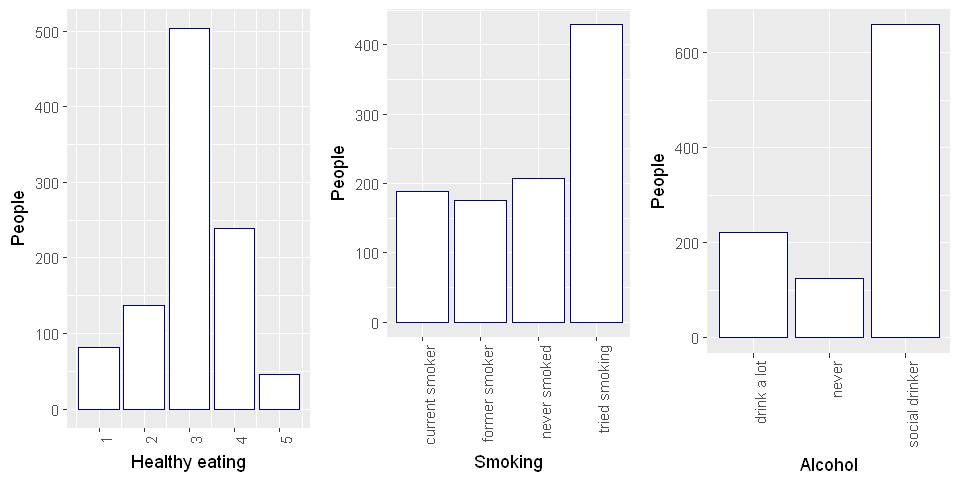

In [3]:
require(ggplot2) 
require(gridExtra)
options(repr.plot.width=8, repr.plot.height=4)

## Look into health habbits
p1 = ggplot(people, aes(x=Healthy.eating)) + 
  geom_bar(na.action(na.omit), colour = "darkblue", fill = "white") + 
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
    ylab("People") + xlab("Healthy eating")

p2 = ggplot(subset(people, Smoking !=''), aes(x=Smoking)) + 
  geom_bar(colour = "darkblue", fill = "white") + 
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) + 
    ylab("People") + xlab("Smoking")

p3 = ggplot(subset(people, Alcohol !=''), aes(x=Alcohol)) + 
  geom_bar(colour = "darkblue", fill = "white") + 
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
    ylab("People") + xlab("Alcohol")

grid.arrange(p1, p2, p3, ncol = 3)

From these histograms we can see that:

- There are less people who eat very healthy than people who eat don't healthy at all. 
- The main mass of the students are tried smoking, social drinker and think about what are they eating for some extent. 
- There are more people who drink a lot than who never drink. 

So from these observetions I conclude that young people still don't think about their health too much. 

Next let's see if there any correlations with other features. 

Warning message:
"Removed 3 rows containing missing values (geom_point)."

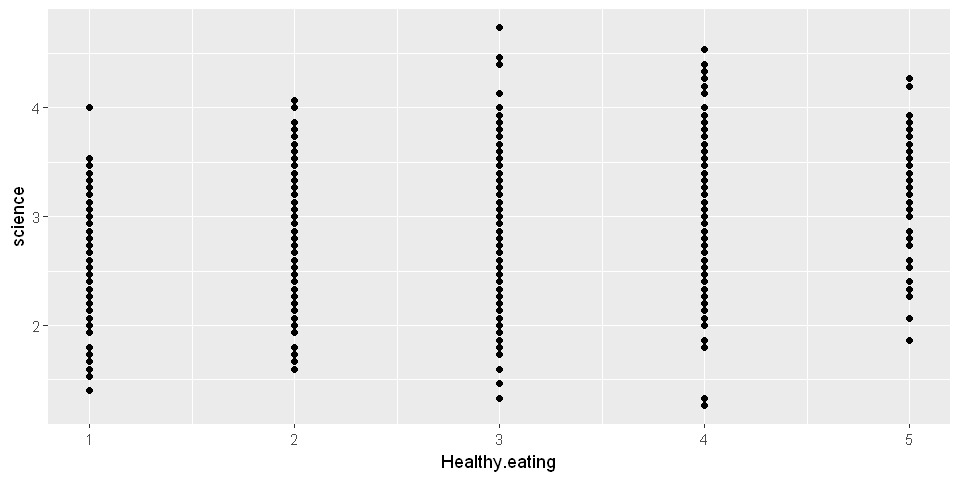

In [4]:
#Helthy eating and academic subjects
ggplot(people, aes(Healthy.eating, science)) + geom_point()

I took a mean for all academic sujects to reduce dementionality. As we can see there isn't any corelations between the intention to eat healthy and the love to learn different topics.
What about health and love for food? 

Warning message:
"Removed 1 rows containing non-finite values (stat_binhex)."

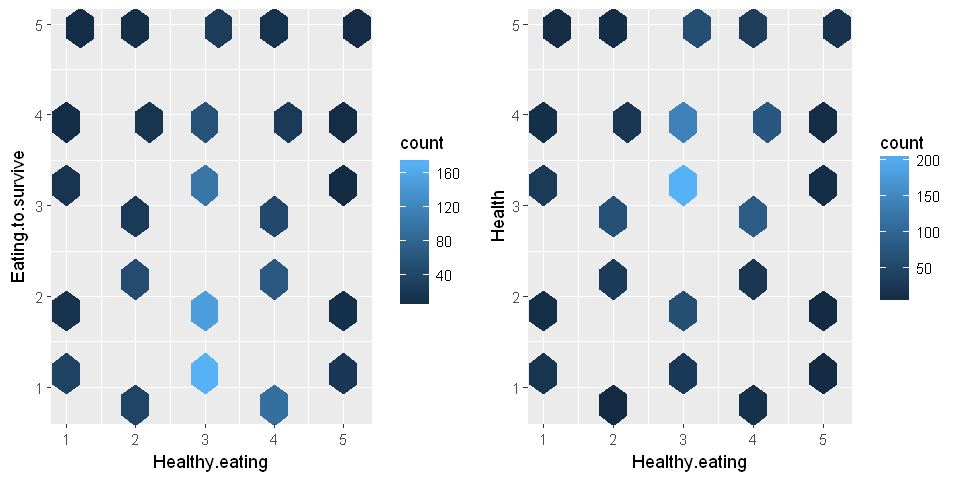

In [5]:
#Helthy eating and eating to survive
p1 <- ggplot(subset(people, Healthy.eating != 0), aes(Healthy.eating, Eating.to.survive)) + stat_binhex(bins=10)

#Helthy eating and worry about their health
p2 <- ggplot(subset(people, Healthy.eating != 0), aes(Healthy.eating, Health)) + stat_binhex(bins=10)

grid.arrange(p1, p2, ncol = 2)

As we can see there aren't many people who don't like to eat and do it just to survive and it doesn't matter if these people eat healthy or not.
Interesting that some people don't worry about health but trying to eat healthy and some worry about health but admit that prefer unhealthy food. 
What about the people who like sport?  

Warning message:
"Removed 4 rows containing non-finite values (stat_binhex)."Warning message:
"Removed 15 rows containing non-finite values (stat_binhex)."

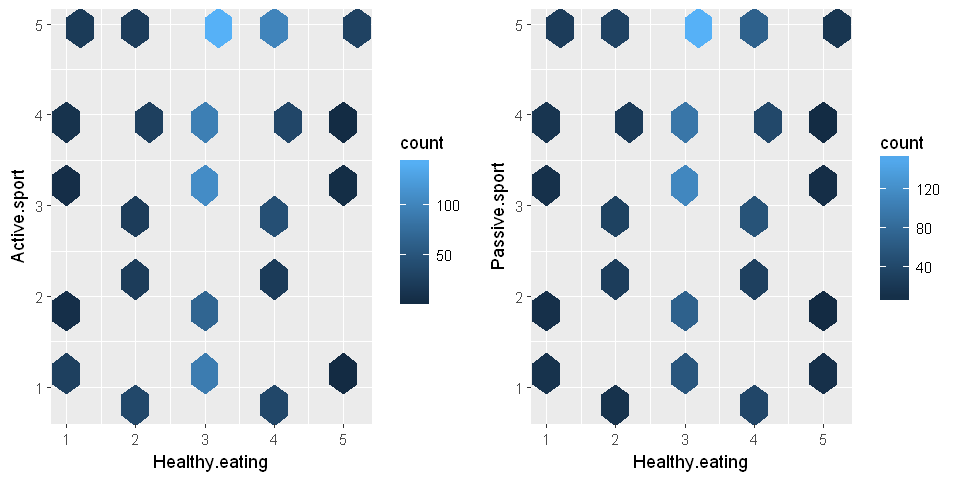

In [6]:
options(repr.plot.width=8, repr.plot.height=4)
#Helthy eating and eating to survive
p1 <- ggplot(subset(people, Healthy.eating != 0), aes(Healthy.eating, Active.sport)) + stat_binhex(bins=10)

#Helthy eating and worry about my health
p2 <- ggplot(subset(people, Healthy.eating != 0), aes(Healthy.eating, Passive.sport)) + stat_binhex(bins=10)

grid.arrange(p1, p2, ncol = 2)

We can see many students likes sport very much and some of them think how to eat healthy. Let's compare the numbers: 

In [7]:
require(dplyr)
df = people %>% filter(Active.sport == 5) %>% count(Active.sport)
df
df = people %>% filter(Active.sport ==5 &  (Healthy.eating ==5 |  Healthy.eating ==4)) %>%
  count(Active.sport, Healthy.eating)
df
df = people %>% filter(Reading == 5) %>% count(Reading)
df
df = people %>% filter(Reading ==5 & (Healthy.eating ==5 |  Healthy.eating ==4)) %>%
  count(Reading, Healthy.eating)
df
df = people %>% filter(Cars == 5) %>% count(Cars)
df
df = people %>% filter(Cars ==5 & (Healthy.eating ==5 |  Healthy.eating ==4)) %>%
  count(Cars, Healthy.eating)
df

Loading required package: dplyr

Attaching package: 'dplyr'

The following object is masked from 'package:gridExtra':

    combine

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Active.sport,n
5,318


Active.sport,Healthy.eating,n
5,4,99
5,5,30


Reading,n
5,277


Reading,Healthy.eating,n
5,4,77
5,5,15


Cars,n
5,162


Cars,Healthy.eating,n
5,4,36
5,5,13


We can see that 40% of people who are very interested in active sport live a very healthy lifestyle, in comparison only 33% of reading people and 30% of people who interested in cars think strongly about healthy living.    

Next, I would like to see relationship between smoking, alcohol and several other preferences.  

Warning message:
"Removed 4 rows containing non-finite values (stat_bin)."

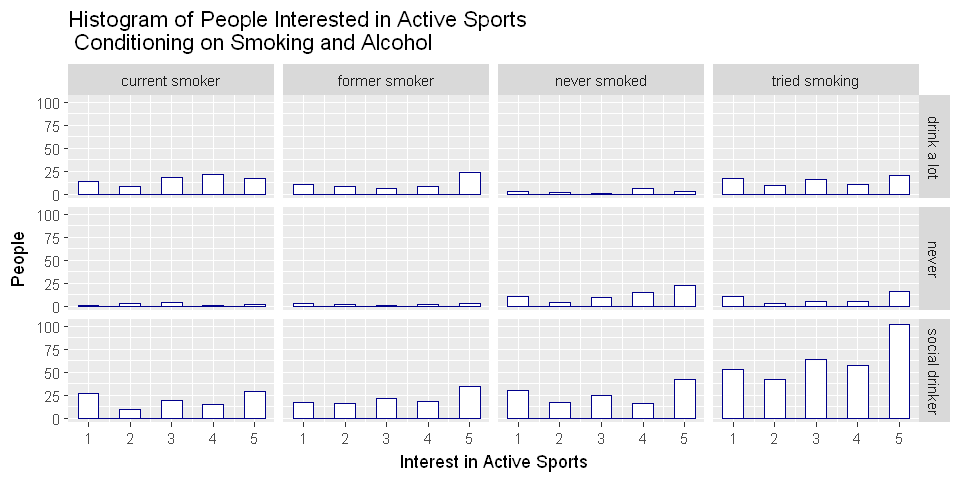

In [8]:
ggplot(subset(people, (Alcohol !='' & Smoking != '')), aes(Active.sport)) + 
  geom_histogram(binwidth = 0.5, colour = "darkblue", fill = "white") + 
  facet_grid(Alcohol ~ Smoking) +
  ylab('People') + xlab('Interest in Active Sports') +   
  ggtitle('Histogram of People Interested in Active Sports \n Conditioning on Smoking and Alcohol')

Warning message:
"Removed 3 rows containing non-finite values (stat_bin)."

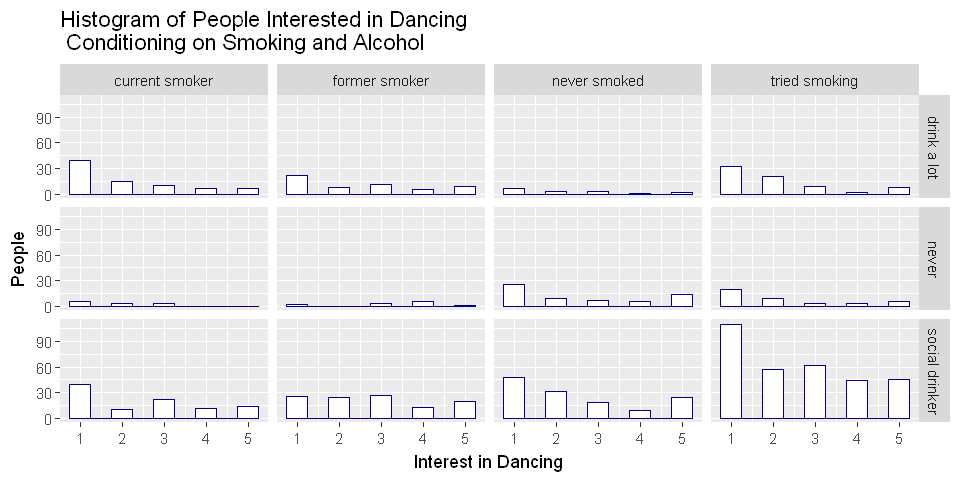

In [9]:
ggplot(subset(people, (Alcohol !='' & Smoking != '')), aes(Dancing)) + 
  geom_histogram(binwidth = 0.5, colour = "darkblue", fill = "white") + 
  facet_grid(Alcohol ~ Smoking) +
  ylab('People') + xlab('Interest in Dancing') +   
  ggtitle('Histogram of People Interested in Dancing \n Conditioning on Smoking and Alcohol')

Warning message:
"Removed 3 rows containing non-finite values (stat_bin)."

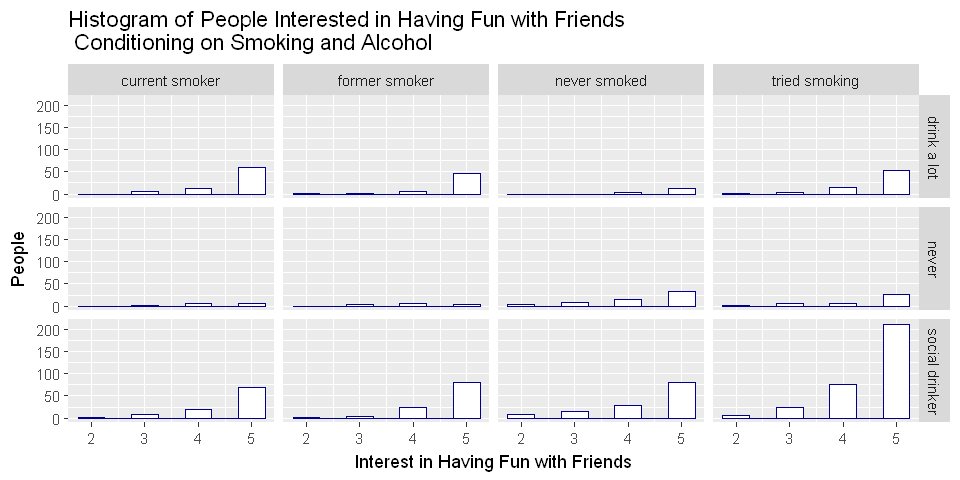

In [10]:
ggplot(subset(people, (Alcohol !='' & Smoking != '')), aes(Fun.with.friends)) + 
  geom_histogram(binwidth = 0.5, colour = "darkblue", fill = "white") + 
  facet_grid(Alcohol ~ Smoking) +
  ylab('People') + xlab('Interest in Having Fun with Friends') +   
  ggtitle('Histogram of People Interested in Having Fun with Friends \n Conditioning on Smoking and Alcohol')

From these plots we can make several conclusions:
 - Love to active sports doesn't stop people from drinking ether socially or a lot.  
 - The most popular group of people are social drinker who tried smoking.
 - Many young people don't like dancing at all. 
 - Everybody likes to have fun with friends, there isn't a single person who strongly disagree to have a fun time with friends.
 - Some of people don't like to spend time with friends but still have to drink with a crowd from time to time.   

Warning message:
"Removed 1 rows containing non-finite values (stat_bin)."

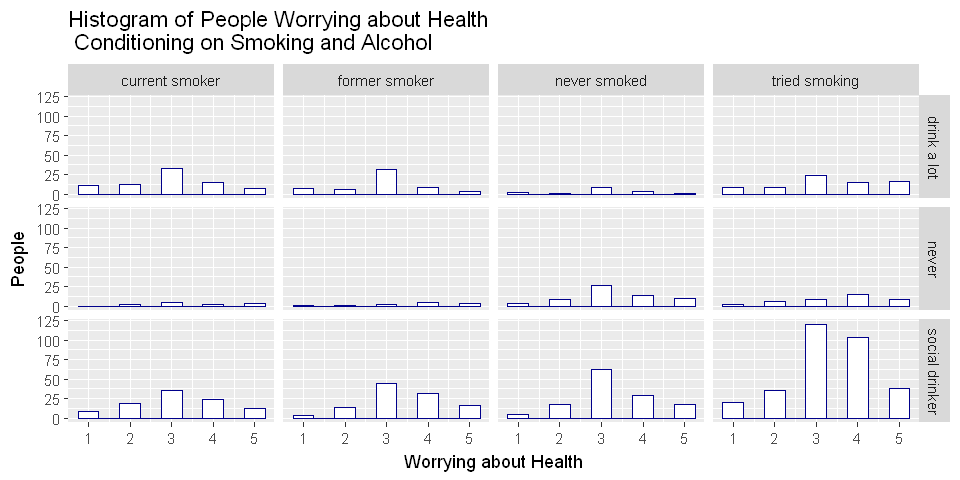

In [11]:
ggplot(subset(people, (Alcohol !='' & Smoking != '')), aes(Health)) + 
  geom_histogram(binwidth = 0.5, colour = "darkblue", fill = "white") + 
  facet_grid(Alcohol ~ Smoking) +
   ylab('People') + xlab('Worrying about Health') +   
  ggtitle('Histogram of People Worrying about Health \n Conditioning on Smoking and Alcohol')

Warning message:
"Removed 1 rows containing non-finite values (stat_bin)."

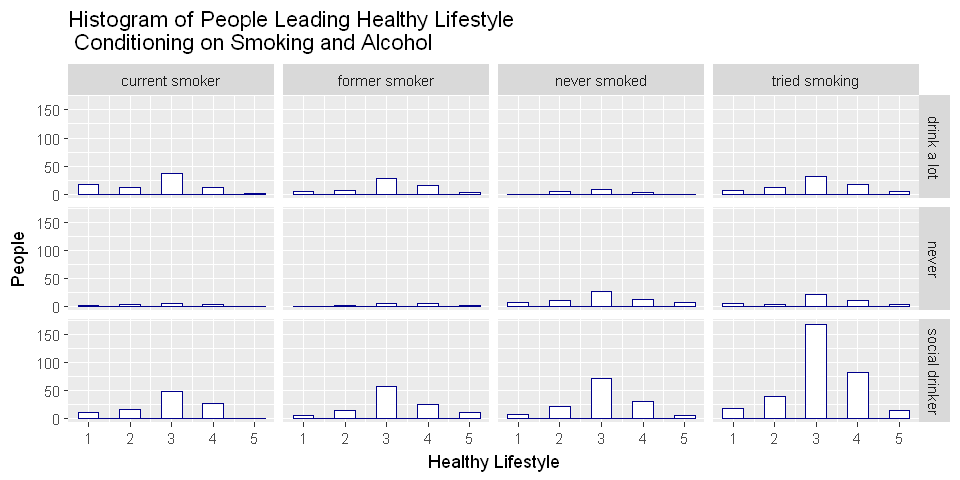

In [12]:
ggplot(subset(people, (Alcohol !='' & Smoking != '')), aes(Healthy.eating)) + 
  geom_histogram(binwidth = 0.5, colour = "darkblue", fill = "white") + 
  facet_grid(Alcohol ~ Smoking) +
  ylab('People') + xlab('Healthy Lifestyle') +   
  ggtitle('Histogram of People Leading Healthy Lifestyle \n Conditioning on Smoking and Alcohol')

We can see that:
 - Even people who smoke and drink a lot worry about their health, some of them strongly. 
 - Current smokers worry about their health but admit that don't prefer a very healthy diet. 
 
 
 Next, I've decided to see if there is a **correlation between how many phobias people have and which hand is dominant**.
 First, let's see how scared young people in general and how many right- and left-handed people in our group.  

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


[1] 2.554158

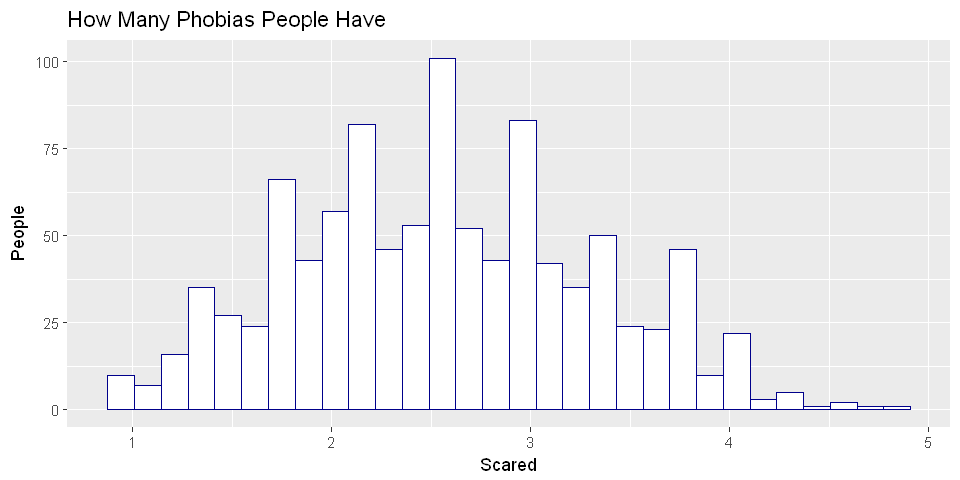

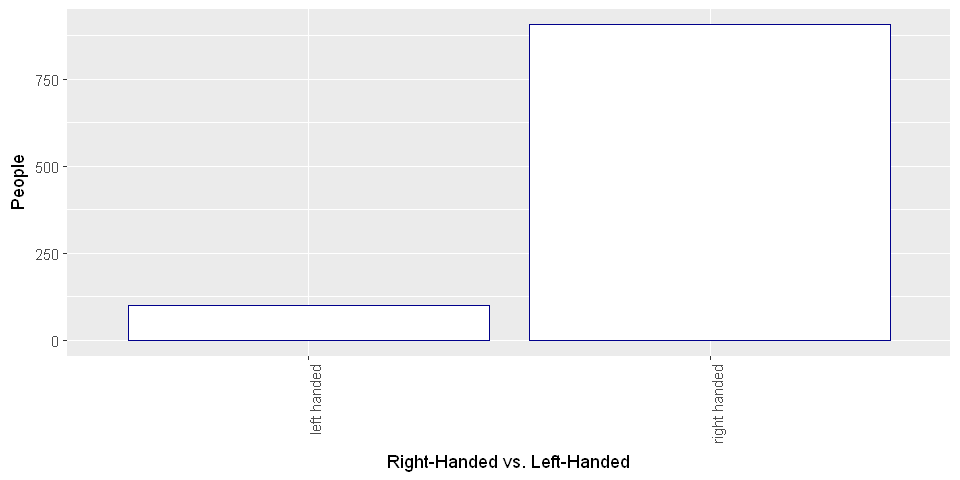

In [13]:
## How scared young people in general
ggplot(people, aes(scared)) + geom_histogram(colour = "darkblue", fill = "white") + 
  ggtitle('How Many Phobias People Have') + xlab('Scared') + ylab('People')

mean(people$scared)

## How may right and left handed people
ggplot(subset(people, Left...right.handed !=''), aes(x=Left...right.handed)) + 
  geom_bar(colour = "darkblue", fill = "white") + 
  theme(axis.text.x = element_text(angle = 90, hjust = 1))  + xlab('Right-Handed vs. Left-Handed') + ylab('People')

From this plots we can see that young people don't have many phobias, the mean is shifted to the left. 
And we see that there are a lot more people who have a dominant right hand. Let's see how scared people by groups.

Loading required package: boot
Simple Bootstrap Routines (1.1-3 2008-04-30)
Loading required package: repr


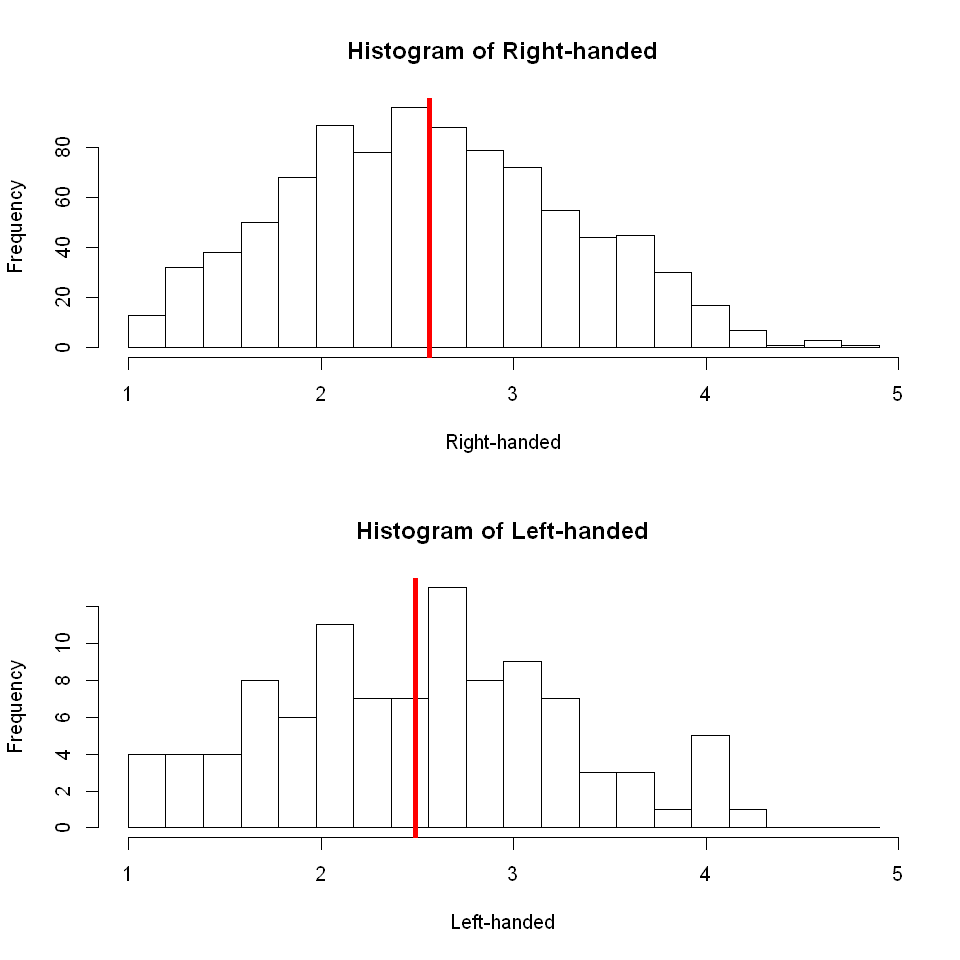

In [14]:
library(HistData)
library(resample)
library(simpleboot)
require(repr)

r.handed = people[people$Left...right.handed == 'right handed',]
l.handed = people[people$Left...right.handed == 'left handed',]
options(repr.plot.width=8, repr.plot.height=8)
plot.dists(r.handed$scared, l.handed$scared, cols = c('Right-handed', 'Left-handed'), nbins = 20)

We can see, that there aren't much differences between the groups, but the sample sizes are too different, so I've used the bootstrap method.

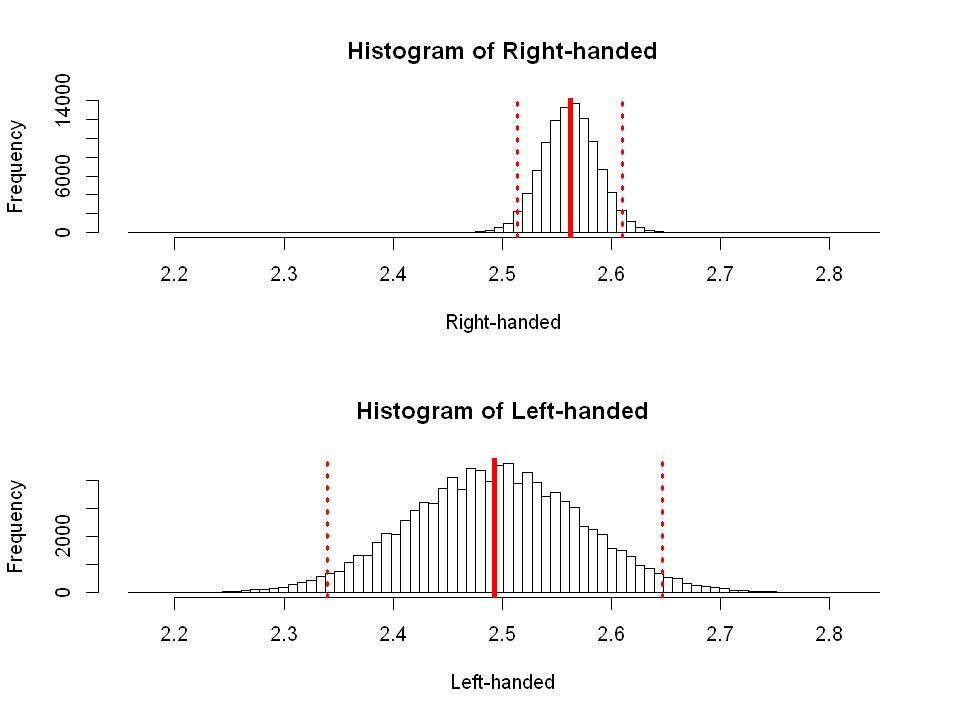

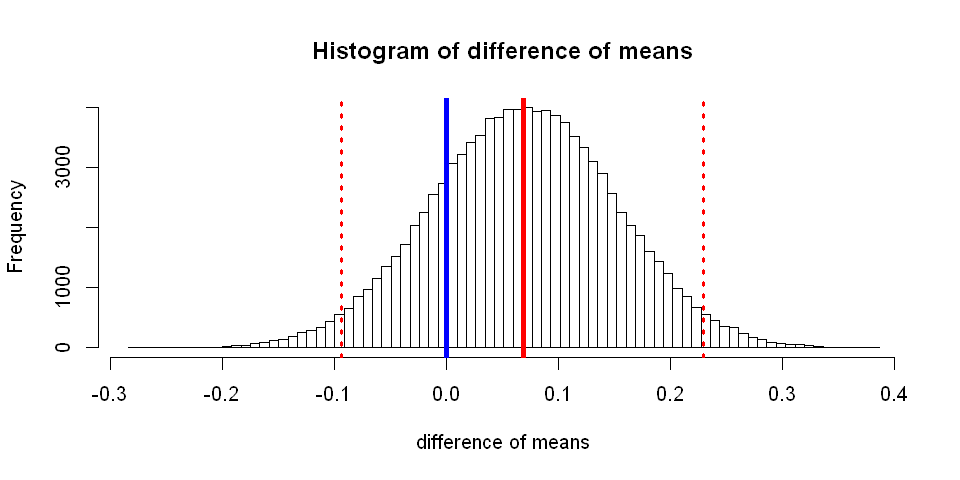

In [15]:
## Bootstrap the mean of how scared the right-handed and left-handed people are
mean.boot.right = one.boot(na.omit(r.handed$scared), mean, R = 100000)
mean.boot.left = one.boot(na.omit(l.handed$scared), mean, R = 100000)
options(repr.plot.width=8, repr.plot.height=6)
plot.t(mean.boot.right$t, mean.boot.left$t, nbins = 80, cols = c('Right-handed', 'Left-handed'))

two.boot.hand= two.boot(na.omit(r.handed$scared), na.omit(l.handed$scared), mean, R = 100000)
options(repr.plot.width=8, repr.plot.height=4)
plot.diff(two.boot.hand$t)
#difference of means isn't significantly different 

The differences of mean is really close to zero, so we can conclude that the phobias are of the same level for left- and right-handed people. 

In the last part of the project I'll predict person's gender using some of their likes or dislikes. I took several parameters that are most likely defferent for male and female students. I created naiveBayes and glm models for predictions.    

In [16]:
## Split data set to train set and test set
peopleSplit <- partitionExact(subset(people, Gender != ''), fractionOfTest=0.4)
testPeople <- peopleSplit$testingData
trainPeople <-peopleSplit$trainingData

## Formula for creating a model
formula <- Gender ~ Latino + Musical + Romantic + War + Shopping + Cars

require(e1071)
## Create a model
nbModel<-naiveBayes(formula = formula, data=trainPeople, na.action = na.omit)
## Predict person's gender
predictedProbabilities.NB <- predict(nbModel, newdata = testPeople, type = "raw")

## Confusinon matrix
predicted.NB <- ifelse(predictedProbabilities.NB[,1] > 0.5, "female", "male")
print(" ")
print(" -------------------------------- ")
print("Confusion Matrix Naive Bayes")

## Create a table to compare predicted values to actual values
t <- table(predicted.NB,testPeople$Gender,dnn=c("Predicted","Actual"))
print(t)
cat(paste('accuracy =', as.character((t[1] + t[4])/(t[1] + t[4] + t[2] + t[3])), '\n'))      
cat(paste('precision =', as.character(signif(t[1]/(t[1] + t[2])), digits = 2)), '\n')     
cat(paste('recall =', as.character(t[1]/(t[1] + t[3]))))

Loading required package: e1071
Warning message in data.matrix(newdata):
"NAs introduced by coercion"Warning message in data.matrix(newdata):
"NAs introduced by coercion"Warning message in data.matrix(newdata):
"NAs introduced by coercion"Warning message in data.matrix(newdata):
"NAs introduced by coercion"Warning message in data.matrix(newdata):
"NAs introduced by coercion"Warning message in data.matrix(newdata):
"NAs introduced by coercion"Warning message in data.matrix(newdata):
"NAs introduced by coercion"Warning message in data.matrix(newdata):
"NAs introduced by coercion"Warning message in data.matrix(newdata):
"NAs introduced by coercion"Warning message in data.matrix(newdata):
"NAs introduced by coercion"Warning message in data.matrix(newdata):
"NAs introduced by coercion"

[1] " "
[1] " -------------------------------- "
[1] "Confusion Matrix Naive Bayes"
         Actual
Predicted female male
   female    206   31
   male       31  134
accuracy = 0.845771144278607 
precision = 0.869198 
recall = 0.869198312236287

Next, logistic regression model.  

In [17]:
people <- read.people()
people$Gender <- ifelse(people$Gender == 'male', 1, 0)
peopleSplit <- partitionExact(subset(people, Gender != ''), fractionOfTest=0.4)
testPeople <- peopleSplit$testingData
trainPeople <-peopleSplit$trainingData

## Create logistic regression
glmModel <- glm(formula = formula, family = "binomial", data = trainPeople)
## Predict person's gender
predictedProbabilities.GLM <- predict(glmModel, newdata = testPeople, type = "response")

predicted.GLM <- ifelse(predictedProbabilities.GLM > 0.5, "Male", "Female")
print(" ")
print(" -------------------------------- ")
print("Confusion Matrix for Logistic Regression")

## Create a table to compare predicted values to actual values
t <- table(predicted.GLM,testPeople$Gender,dnn=c("Predicted","Actual"))
print(t)
cat(paste('accuracy =', as.character((t[1] + t[4])/(t[1] + t[4] + t[2] + t[3])), '\n'))      
cat(paste('precision =', as.character(signif(t[1]/(t[1] + t[2])), digits = 2)), '\n')     
cat(paste('recall =', as.character(t[1]/(t[1] + t[3]))))

[1] " "
[1] " -------------------------------- "
[1] "Confusion Matrix for Logistic Regression"
         Actual
Predicted   0   1
   Female 202  44
   Male    26 127
accuracy = 0.824561403508772 
precision = 0.885965 
recall = 0.821138211382114

After analizing confusion matrix, accuracy,percision and recall of both predictions we can tell that both models works quite well. And from these numbers it's hard to tell that one model noticebly better than the other. 

## Conclusion. 
In this project I've explored and visualized data to look into the data relashionsip. I've used the bootstrap method to compare compare the data. Finally, I've created two models to predict person's gender using several features from this data set.    